In [0]:
import torch
from torchvision import datasets, transforms
from torch import nn
from torch import optim

In [4]:
transform = transforms.Compose([transforms.ToTensor() , transforms.Normalize((0.5,),(0.5,)),])
trainset = trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

0it [00:00, ?it/s]

26427392it [00:01, 13993554.94it/s]                             


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 88689.06it/s]                            
0it [00:00, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz


4423680it [00:01, 3576737.67it/s]                             
0it [00:00, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 25628.36it/s]            

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [0]:
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)


In [0]:
#building a forward feed network
model = nn.Sequential(nn.Linear(784,128), nn.ReLU(), nn.Linear(128,64), nn.ReLU() , nn.Linear(64,10), nn.LogSoftmax(dim = 1))


In [0]:
#criterion declaration 
#criterion = nn.NLLLoss()
criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(model.parameters() , lr = 0.01)



In [0]:
epoch = 25

loss = 0 
for m in range(epoch):
  images, labels = next(iter(trainloader))
  images = images.view(images.shape[0], -1)
  #print(images.shape)
  model.zero_grad()
  output = model.forward(images)
  loss = criterion(output, labels)
  loss.backward()
  optimiser.step()
  print(loss)



tensor(2.1412, grad_fn=<NllLossBackward>)
tensor(2.1863, grad_fn=<NllLossBackward>)
tensor(2.1844, grad_fn=<NllLossBackward>)
tensor(2.1206, grad_fn=<NllLossBackward>)
tensor(2.1545, grad_fn=<NllLossBackward>)
tensor(2.1329, grad_fn=<NllLossBackward>)
tensor(2.1527, grad_fn=<NllLossBackward>)
tensor(2.1294, grad_fn=<NllLossBackward>)
tensor(2.1304, grad_fn=<NllLossBackward>)
tensor(2.1076, grad_fn=<NllLossBackward>)
tensor(2.1260, grad_fn=<NllLossBackward>)
tensor(2.1086, grad_fn=<NllLossBackward>)
tensor(2.0691, grad_fn=<NllLossBackward>)
tensor(2.0747, grad_fn=<NllLossBackward>)
tensor(2.0982, grad_fn=<NllLossBackward>)
tensor(2.0942, grad_fn=<NllLossBackward>)
tensor(2.1133, grad_fn=<NllLossBackward>)
tensor(2.0932, grad_fn=<NllLossBackward>)
tensor(2.0819, grad_fn=<NllLossBackward>)
tensor(2.0476, grad_fn=<NllLossBackward>)
tensor(2.0494, grad_fn=<NllLossBackward>)
tensor(2.0850, grad_fn=<NllLossBackward>)
tensor(2.0711, grad_fn=<NllLossBackward>)
tensor(2.0520, grad_fn=<NllLossBac

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [0]:
import helper

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images.view(images.shape[0], -1)





In [0]:
ps = torch.exp(model(img))


In [84]:
import matplotlib.pyplot as plt
import numpy as np

def view_classify(img, ps, version):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

plt.tight_layout()

<Figure size 432x288 with 0 Axes>

TypeError: ignored

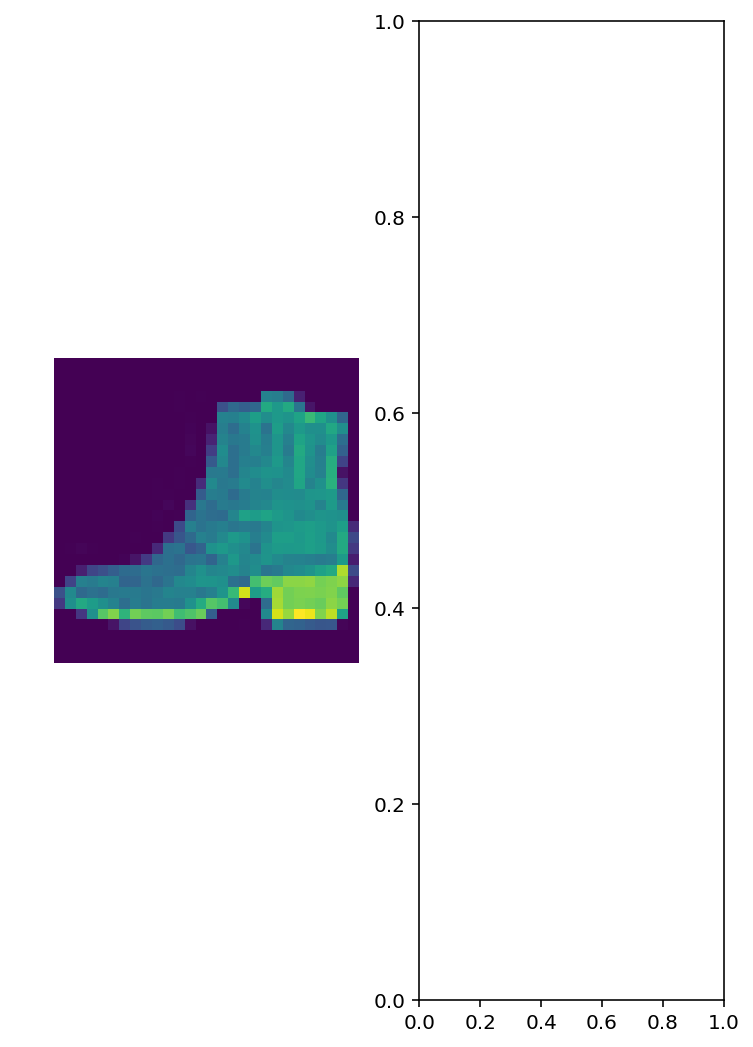

In [85]:
view_classify(img,ps,version = 'Fashion')